In [253]:
# library to handle requests
import requests
# library for data analsysis
import pandas as pd
# library
import wikipedia as wp
import numpy as np
import folium
from pandas.io.json import json_normalize
import json
from IPython.display import display
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
# import plotting
from matplotlib import pyplot as plt
# import GEO data API
from geopy.geocoders import Nominatim


In [254]:
html = wp.page("List_of_cities_and_towns_in_Colorado").html().encode("UTF-8")
co_municipality = pd.read_html(html)[0]
co_municipality.to_csv('wiki_colorado_2.csv',header=0,index=False)
co_municipality.head()

,Place Name,Municipality,Incorporation Date,Government,County,Map,Pop Rank,2014 Estimate,2010 Census,Change,Pop Density,Land Area,Water Area,Total Area,INCITS,WGS84
0,Aguilar,Town of Aguilar,"January 10, 1894",statutory town,Las Animas County,map,197,495,538,â7.99%,â2 487 kmâ2,â2 1.0161 kmâ2,NaN,â2 1.0161 kmâ2,800760,37Â°24â²13â³N 104Â°39â²18â³W﻿ / ﻿37.403626...
1,Akron,Town of Akron,"September 22, 1887",statutory town,Washington County[8],map,121,1694,1702,â0.47%,â2 251 kmâ2,â2 6.7973 kmâ2,NaN,â2 6.7973 kmâ2,800925,40Â°09â²52â³N 103Â°13â²14â³W﻿ / ﻿40.164382...
2,Alamosa,City of Alamosa,"August 12, 1878",home rule municipality,Alamosa County[8],map,48,9531,8780,+8.55%,â2 501 kmâ2,â2 19.0788 kmâ2,â2 0.3222 kmâ2,â2 19.4010 kmâ2,801090,37Â°28â²30â³N 105Â°52â²31â³W﻿ / ﻿37.475041...
3,Alma,Town of Alma,"December 2, 1873",statutory town,Park County,map,221,275,270,+1.85%,â2 286 kmâ2,â2 0.9325 kmâ2,â2 0.0049 kmâ2,â2 0.9374 kmâ2,801530,39Â°17â²09â³N 106Â°03â²59â³W﻿ / ﻿39.285942...
4,Antonito,Town of Antonito,"December 29, 1889",statutory town,Conejos County,map,163,775,781,â0.77%,â2 744 kmâ2,â2 1.0446 kmâ2,NaN,â2 1.0446 kmâ2,802355,37Â°04â²36â³N 106Â°00â²37â³W﻿ / ﻿37.076605...


In [255]:
def format_lat_lon(wgs84_str):
    lat_lon = wgs84_str.split(" / ")[1]
    
    lat_str = lat_lon.split(" ")[0]
    lat = float(lat_str[1:-3]) if lat_str[-1] is 'N' else float(lat_str[1:-3])*-1
    
    lon_str = lat_lon.split(" ")[1]
    lon = float(lon_str[:-3]) if lon_str[-1] is 'E' else float(lon_str[:-3])*-1
    
    return [lat,lon]

In [256]:
co_municipality['Latitude'] = co_municipality['WGS84'].apply(lambda x : format_lat_lon(x)[0])
co_municipality['Longitude'] = co_municipality['WGS84'].apply(lambda x : format_lat_lon(x)[1])
co_municipality.head()

,Place Name,Municipality,Incorporation Date,Government,County,Map,Pop Rank,2014 Estimate,2010 Census,Change,Pop Density,Land Area,Water Area,Total Area,INCITS,WGS84,Latitude,Longitude
0,Aguilar,Town of Aguilar,"January 10, 1894",statutory town,Las Animas County,map,197,495,538,â7.99%,â2 487 kmâ2,â2 1.0161 kmâ2,NaN,â2 1.0161 kmâ2,800760,37Â°24â²13â³N 104Â°39â²18â³W﻿ / ﻿37.403626...,37.403626,-104.655036
1,Akron,Town of Akron,"September 22, 1887",statutory town,Washington County[8],map,121,1694,1702,â0.47%,â2 251 kmâ2,â2 6.7973 kmâ2,NaN,â2 6.7973 kmâ2,800925,40Â°09â²52â³N 103Â°13â²14â³W﻿ / ﻿40.164382...,40.164382,-103.220685
2,Alamosa,City of Alamosa,"August 12, 1878",home rule municipality,Alamosa County[8],map,48,9531,8780,+8.55%,â2 501 kmâ2,â2 19.0788 kmâ2,â2 0.3222 kmâ2,â2 19.4010 kmâ2,801090,37Â°28â²30â³N 105Â°52â²31â³W﻿ / ﻿37.475041...,37.475041,-105.875314
3,Alma,Town of Alma,"December 2, 1873",statutory town,Park County,map,221,275,270,+1.85%,â2 286 kmâ2,â2 0.9325 kmâ2,â2 0.0049 kmâ2,â2 0.9374 kmâ2,801530,39Â°17â²09â³N 106Â°03â²59â³W﻿ / ﻿39.285942...,39.285942,-106.066319
4,Antonito,Town of Antonito,"December 29, 1889",statutory town,Conejos County,map,163,775,781,â0.77%,â2 744 kmâ2,â2 1.0446 kmâ2,NaN,â2 1.0446 kmâ2,802355,37Â°04â²36â³N 106Â°00â²37â³W﻿ / ﻿37.076605...,37.076605,-106.010222


In [257]:
co_municipality.shape

(271, 18)

In [258]:
def createMapView(co_municipality):
    address = 'Denver, CO'

    geolocator = Nominatim(user_agent="denver_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of Denver is {}, {}.'.format(latitude, longitude))

    # create map of resulting co_municipality
    map_co = folium.Map(location=[latitude, longitude], zoom_start=10)

    for lat, lng, place_name in zip(co_municipality['Latitude'], co_municipality['Longitude'], co_municipality['Place Name']):
        label = '{}'.format(place_name)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='blue',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_co)


    return map_co

In [259]:
createMapView(co_municipality)

The geograpical coordinate of Denver is 39.7392364, -104.9848623.


In [260]:
df_boulder = co_municipality[co_municipality['Municipality'] == 'City of Boulder']
df_castle = co_municipality[co_municipality['Municipality'] == 'Town of Castle Rock']
df_lone = co_municipality[co_municipality['Municipality'] == 'City of Lone Tree']

# top left corner of bounding box
ndx_of_intrest_boulder = co_municipality['Place Name'] == 'Boulder'
boulder_lat = co_municipality['Latitude'][ndx_of_intrest_boulder].values[0]
boulder_lon = co_municipality['Longitude'][ndx_of_intrest_boulder].values[0]

# bottom right corner of bounding box
ndx_of_intrest_parker = co_municipality['Place Name'] == 'Parker'
parker_lat = co_municipality['Latitude'][ndx_of_intrest_parker].values[0]
parker_lon = co_municipality['Longitude'][ndx_of_intrest_parker].values[0]


idx_lat = np.logical_and(co_municipality['Latitude'] <= boulder_lat, co_municipality['Latitude'] >= parker_lat)
idx_lon = np.logical_and(co_municipality['Longitude'] >= boulder_lon, co_municipality['Longitude'] <= parker_lon)
areas_of_interest_cleaned = co_municipality[np.logical_and(idx_lat, idx_lon)].reset_index(drop=True)

createMapView(areas_of_interest_cleaned)

The geograpical coordinate of Denver is 39.7392364, -104.9848623.


In [261]:
areas_of_interest.head(32)
areas_of_interest_cleaned = areas_of_interest.drop(['Pop Rank', '2014 Estimate', '2010 Census','Change','Pop Density','Land Area',\
                        'Water Area','Total Area', 'INCITS', 'WGS84'], axis=1)
areas_of_interest_cleaned.head(32)

,Place Name,Municipality,Incorporation Date,Government,County,Map,Latitude,Longitude
0,Arvada,City of Arvada,"August 24, 1904",home rule municipality,Jefferson CountyAdams County,map,39.833728,-105.150306
1,Boulder,City of Boulder,"November 4, 1871[14]",home rule municipality,Boulder County[8],map,40.027435,-105.251945
2,Bow Mar,Town of Bow Mar,August 1958,statutory town,Arapahoe CountyJefferson County,map,39.626594,-105.050914
3,Brighton,City of Brighton,"September 1, 1887",home rule municipality,Adams County[8]Weld County,map,39.964790,-104.796581
4,Broomfield,City and County of Broomfield,"June 6, 1961[16]",consolidated city and county,City and County of Broomfield[17],map,39.953302,-105.052038
5,Centennial,City of Centennial,"February 7, 2001",home rule municipality,Arapahoe County,map,39.590568,-104.869118
6,Cherry Hills Village,City of Cherry Hills Village,"July 19, 1945",home rule municipality,Arapahoe County,map,39.637418,-104.947470
7,Columbine Valley[19],Town of Columbine Valley,"July 2, 1959",statutory town,Arapahoe County,map,39.599580,-105.030771
8,Commerce City,City of Commerce City,"December 18, 1952[20]",home rule municipality,Adams County,map,39.882968,-104.795452
9,Denver,City and County of Denver,"December 3, 1859[22][23]",consolidated city and county,City and County of Denver[24][25],map,39.761850,-104.881105


In [262]:
# Foursquare API Credentials
CLIENT_ID = '1RAZZUPP43HZQWU5GVPVQMW3SJMCAISY40PU1HKUADFKQE5Y' # your Foursquare ID
CLIENT_SECRET = 'XJHXGVLZNXIFJVEUMBJPN14P0EU0X3ZSKNSUKYUBTZY4YENR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1RAZZUPP43HZQWU5GVPVQMW3SJMCAISY40PU1HKUADFKQE5Y
CLIENT_SECRET:XJHXGVLZNXIFJVEUMBJPN14P0EU0X3ZSKNSUKYUBTZY4YENR


In [263]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    return (nearby_venues)

In [264]:
# call getNearbyVenues on my areas of interest
denver_msa_venues = getNearbyVenues(names=areas_of_interest_cleaned['Place Name'],
                                   latitudes=areas_of_interest_cleaned['Latitude'],
                                   longitudes=areas_of_interest_cleaned['Longitude'])

Arvada
Boulder
Bow Mar
Brighton
Broomfield
Centennial
Cherry Hills Village
Columbine Valley[19]
Commerce City
Denver
Edgewater
Englewood
Federal Heights
Foxfield
Glendale
Golden
Greenwood Village
Lafayette
Lakeside[28]
Lakewood
Littleton
Lone Tree
Louisville
Morrison
Mountain View[30]
Northglenn
Parker
Sheridan
Superior
Thornton
Westminster
Wheat Ridge


In [265]:
# print shape of the venues df
print ("Shape of the Venues Dataframe: ", denver_msa_venues.shape)
denver_msa_venues.head()

Shape of the Venues Dataframe:  (1090, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Arvada,39.833728,-105.150306,Youth Memorial Sports Complex,39.834961,-105.148977,Baseball Field
1,Arvada,39.833728,-105.150306,Apex Center,39.825841,-105.145750,Recreation Center
2,Arvada,39.833728,-105.150306,Apex Swimming Pool,39.825838,-105.145876,Gym Pool
3,Arvada,39.833728,-105.150306,Ralston Creek Trail West,39.825756,-105.152996,Trail
4,Arvada,39.833728,-105.150306,Apex Center Ice Arena,39.826422,-105.145112,Skating Rink


In [266]:
# Create a df out of all denver venues to concentrate only on Restaurants 

denver_msa_venues_only_restaurant = denver_msa_venues[denver_msa_venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
denver_msa_venues_only_restaurant.index = np.arange(1, len(denver_msa_venues_only_restaurant)+1)
print ("Shape of the dataFrame with Venue Category as Restaurant: ", denver_msa_venues_only_restaurant.shape)
denver_msa_venues_only_restaurant.head()

Shape of the dataFrame with Venue Category as Restaurant:  (218, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Boulder,40.027435,-105.251945,Fresh Thymes Eatery,40.026845,-105.253392,Gluten-free Restaurant
2,Boulder,40.027435,-105.251945,Curry n Kebob,40.030079,-105.257982,Indian Restaurant
3,Boulder,40.027435,-105.251945,Verde,40.030646,-105.258145,Mexican Restaurant
4,Boulder,40.027435,-105.251945,Chez Thuy,40.027033,-105.258433,Vietnamese Restaurant
5,Boulder,40.027435,-105.251945,Protein Bar & Kitchen,40.019200,-105.256631,Restaurant


In [267]:
# Show in Map the Top Rated Restaruants in the Top 5 Districts
address = 'Denver, CO'

geolocator = Nominatim(user_agent="den_explorer")
den_location = geolocator.geocode(address)
den_latitude = location.latitude
den_longitude = location.longitude
print('The geograpical coordinate of Denver, CO are {}, {}.'.format(den_latitude, den_longitude))


map_restaurants = folium.Map(location=[den_latitude, den_longitude], zoom_start=10, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = denver_msa_venues_only_restaurant['District'].values

x = np.arange(len(Districts))

rainbow = rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, cat, distric in zip(denver_msa_venues_only_restaurant['Venue_Lat'], 
                                  denver_msa_venues_only_restaurant['Venue_Long'], 
                                  denver_msa_venues_only_restaurant['Venue_Category'], 
                                  denver_msa_venues_only_restaurant['District']):
    label = folium.Popup(str(cat) + ' ' + str(distric), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_restaurants)
       
map_restaurants

The geograpical coordinate of Denver, CO are 39.7392364, -104.9848623.


In [268]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(denver_msa_venues['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (denver_msa_venues[['Venue_Category']][70:75])

There are 209 unique categories.
            Venue_Category
70                  Bakery
71         Organic Grocery
72             Pizza Place
73  Furniture / Home Store
74             Coffee Shop


In [269]:
## 215 unique categories in the Denver venues dataframe.
## Find the frequency of each category
print(denver_msa_venues['Venue_Category'].value_counts())
denver_trails = denver_msa_venues[denver_msa_venues['Venue_Category'] == 'Trail']
denver_trails.head(50)

Mexican Restaurant               50
Pizza Place                      42
Coffee Shop                      40
Fast Food Restaurant             36
Park                             34
Sandwich Place                   31
Hotel                            29
Convenience Store                29
American Restaurant              22
Gym / Fitness Center             21
Gym                              18
Pharmacy                         17
Chinese Restaurant               17
Bank                             16
Liquor Store                     15
Grocery Store                    15
Brewery                          14
Restaurant                       14
Italian Restaurant               13
Furniture / Home Store           12
Discount Store                   12
Video Store                      12
Salon / Barbershop               11
Marijuana Dispensary             11
Bakery                           11
Gas Station                      11
Pet Store                        11
Breakfast Spot              

,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
3,Arvada,39.833728,-105.150306,Ralston Creek Trail West,39.825756,-105.152996,Trail
207,Commerce City,39.882968,-104.795452,Second Creek Trail,39.878206,-104.795366,Trail
496,Golden,39.742483,-105.210561,Triceratops Trail,39.742982,-105.220306,Trail
695,Lone Tree,39.530744,-104.871031,Bluffs Regional Park,39.528950,-104.881695,Trail
719,Louisville,39.969532,-105.143215,Coal Creek Trailhead,39.965309,-105.139832,Trail
916,Parker,39.504167,-104.773173,McCabe Meadows Trailhead,39.501254,-104.763106,Trail
958,Superior,39.931190,-105.159085,Coalton Trailhead,39.928901,-105.166664,Trail
970,Superior,39.931190,-105.159085,Meadowlark Trail,39.928750,-105.167504,Trail


### 10 Most Common Venues in the Denver, MSA.

In [270]:

# create a dataframe of top 10 categories
Denver_Venues_Top10 = denver_msa_venues['Venue_Category'].value_counts()[0:10].to_frame(name='Frequency')
Denver_Venues_Top10= Denver_Venues_Top10.reset_index()


Denver_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "Frequency": "Frequency"}, inplace=True)
Denver_Venues_Top10

,Venue_Category,Frequency
0,Mexican Restaurant,50
1,Pizza Place,42
2,Coffee Shop,40
3,Fast Food Restaurant,36
4,Park,34
5,Sandwich Place,31
6,Hotel,29
7,Convenience Store,29
8,American Restaurant,22
9,Gym / Fitness Center,21


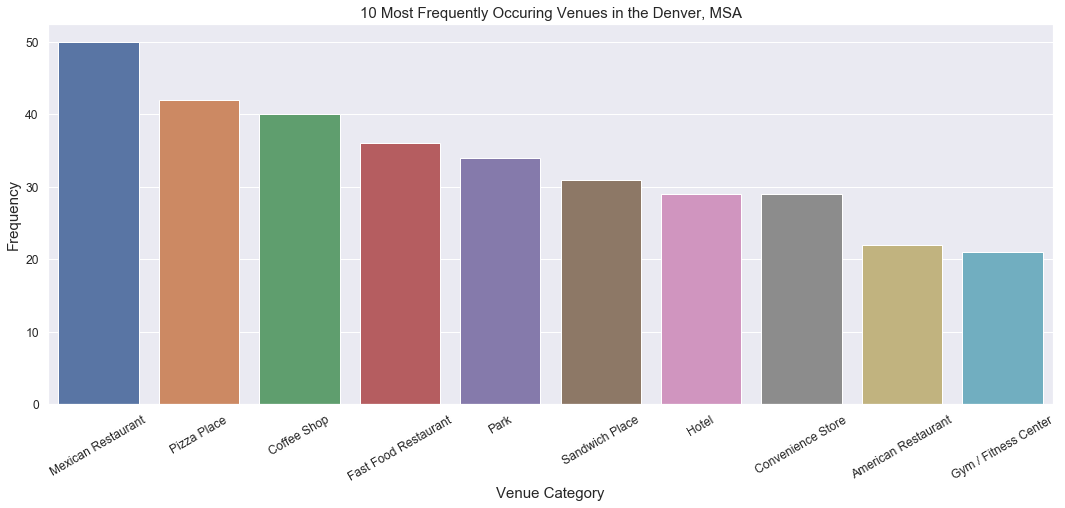

In [271]:
# plot the most common venues.

import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Denver_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in the Denver, MSA', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [272]:
# Going to use one hot encoding (dummy variables)
# One hot encoding is a process by which categorical variables are converted into a form /
# that could be provided to ML algorithms to do a better job in prediction.
denver_msa_venues_onehot = pd.get_dummies(denver_msa_venues[['Venue_Category']], prefix="", prefix_sep="")
# add the district, column back in and make first column.
denver_msa_venues_onehot['District'] = denver_msa_venues['District']
fixed_columns = [denver_msa_venues_onehot.columns[-1]] + list(denver_msa_venues_onehot.columns[:-1])
denver_msa_venues_onehot = denver_msa_venues_onehot[fixed_columns]
# print
denver_msa_venues_onehot.shape

(1090, 210)

In [273]:
# Grab the mean of each venue within each district.
# Group the df by District.
denver_msa_venues_grouped = denver_msa_venues_onehot.groupby('District').mean().reset_index()
denver_msa_venues_grouped.shape

(31, 210)

In [274]:
num_top_venues = 10
for hood in denver_msa_venues_grouped['District']:
    print('-----'+hood+'-----')
    temp = denver_msa_venues_grouped[denver_msa_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['Venue', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
    

-----Arvada-----
                        Venue  Frequency
0                Skating Rink       0.17
1                        Park       0.17
2              Baseball Field       0.17
3                    Gym Pool       0.08
4        Gym / Fitness Center       0.08
5                       Trail       0.08
6           Food & Drink Shop       0.08
7           Recreation Center       0.08
8  Construction & Landscaping       0.08
9                  Nail Salon       0.00


-----Boulder-----
                  Venue  Frequency
0           Pizza Place       0.06
1                   Gym       0.06
2               Brewery       0.04
3    Mexican Restaurant       0.04
4        Sandwich Place       0.04
5           Coffee Shop       0.04
6     Convenience Store       0.03
7  Fast Food Restaurant       0.03
8       Organic Grocery       0.03
9             Bookstore       0.03


-----Bow Mar-----
                    Venue  Frequency
0       Convenience Store       0.50
1  Furniture / Home Store       0

In [275]:
# function to sort venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [276]:
# create new datafram and display the top 10 venues for each district.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
district_venues_sorted = pd.DataFrame(columns = columns)
district_venues_sorted['District'] = denver_msa_venues_grouped['District']

for ind in np.arange(denver_msa_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(denver_msa_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head(32)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arvada,Baseball Field,Park,Skating Rink,Construction & Landscaping,Food & Drink Shop,Recreation Center,Trail,Gym Pool,Gym / Fitness Center,Flea Market
1,Boulder,Gym,Pizza Place,Sandwich Place,Coffee Shop,Mexican Restaurant,Brewery,Fast Food Restaurant,Organic Grocery,Bookstore,Convenience Store
2,Bow Mar,Convenience Store,Furniture / Home Store,Beach,Zoo,Fast Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop
3,Brighton,Cosmetics Shop,Pool,Park,Theme Park,Zoo,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop
4,Broomfield,Ice Cream Shop,Park,Pool,Spa,Soccer Field,Brewery,Lake,Fast Food Restaurant,Fried Chicken Joint,French Restaurant
5,Centennial,Hotel,BBQ Joint,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Indian Restaurant,Donut Shop,Sandwich Place,Restaurant,Rental Car Location
6,Cherry Hills Village,Pizza Place,Deli / Bodega,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop
7,Columbine Valley[19],Garden,Furniture / Home Store,American Restaurant,Park,Coffee Shop,Golf Course,Brewery,Field,Frozen Yogurt Shop,Fried Chicken Joint
8,Commerce City,Pizza Place,Trail,Liquor Store,Mexican Restaurant,Food,Music Venue,Park,Deli / Bodega,Convenience Store,Chinese Restaurant
9,Denver,Pool,Park,Recreation Center,Restaurant,Zoo,Farm,French Restaurant,Food Truck,Food & Drink Shop,Food


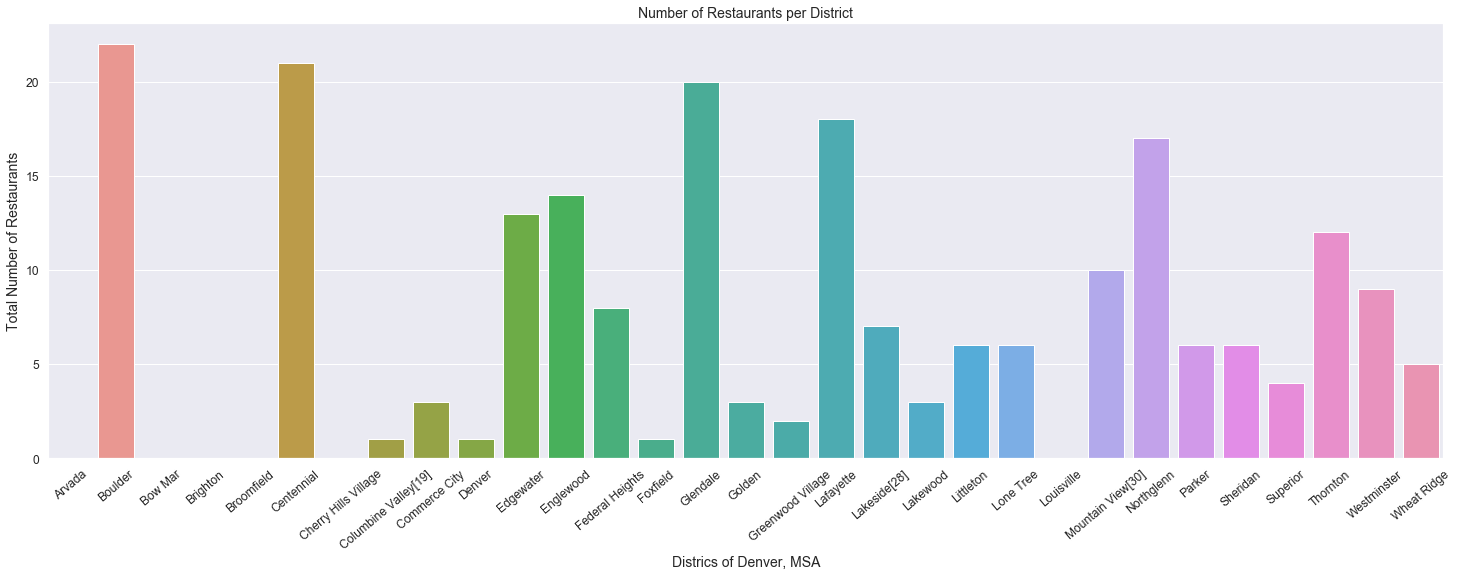

In [277]:
# Graph number of restaurants in each district
denver_msa_venues_only_restaurant = denver_msa_venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
denver_msa_venues_only_restaurant_df = denver_msa_venues_only_restaurant.to_frame().reset_index()
denver_msa_venues_only_restaurant_df.columns = ['District', 'Number of Restaurant']


list_rest_no = denver_msa_venues_only_restaurant_df['Number of Restaurant'].to_list()
#print (list_rest_no)
fig = plt.figure(figsize=(25,8))
bar = sns.barplot(x='District', y='Number of Restaurant', data=denver_msa_venues_only_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Districs of Denver, MSA", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants per District", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

                District  Number of Trail
0                 Arvada                1
1                Boulder                0
2                Bow Mar                0
3               Brighton                0
4             Broomfield                0
5             Centennial                0
6   Cherry Hills Village                0
7   Columbine Valley[19]                0
8          Commerce City                1
9                 Denver                0
10             Edgewater                0
11             Englewood                0
12       Federal Heights                0
13              Foxfield                0
14              Glendale                0
15                Golden                1
16     Greenwood Village                0
17             Lafayette                0
18          Lakeside[28]                0
19              Lakewood                0
20             Littleton                0
21             Lone Tree                1
22            Louisville          

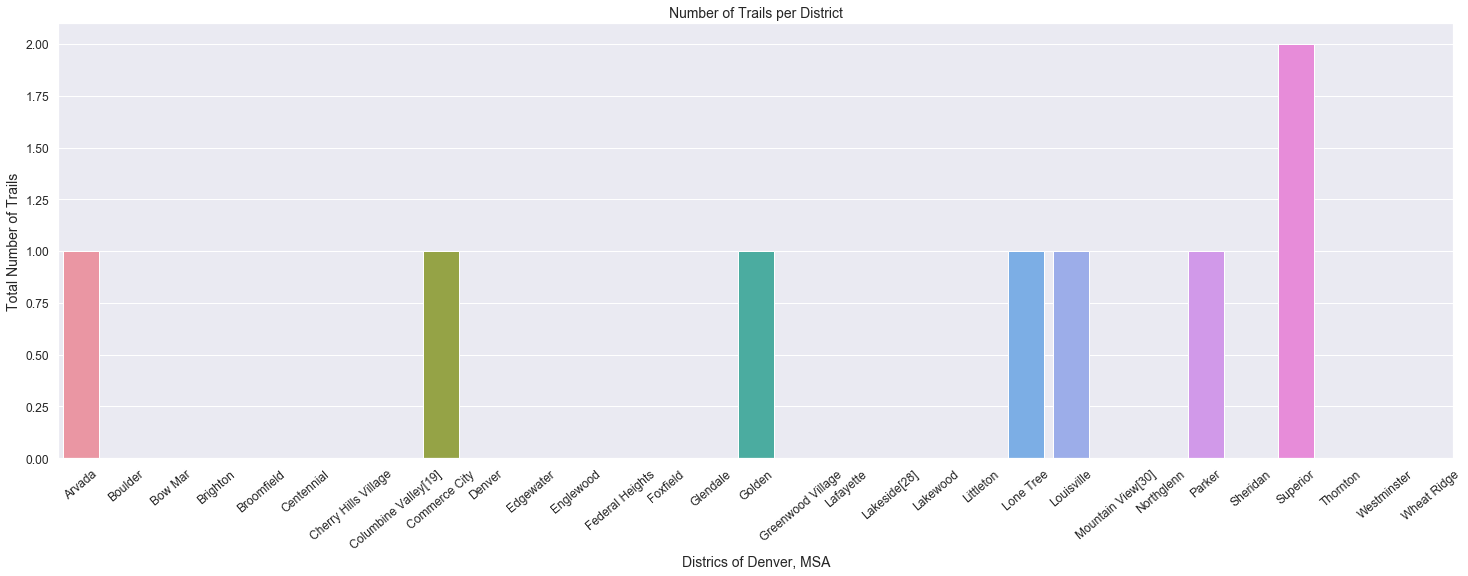

In [278]:
# Graph number of parks by district
denver_msa_venues_only_trail = denver_msa_venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Trail')].count())
denver_msa_venues_only_trail_df = denver_msa_venues_only_trail.to_frame().reset_index()
denver_msa_venues_only_trail_df.columns = ['District', 'Number of Trail']

print(denver_msa_venues_only_trail_df)
list_trail_no = denver_msa_venues_only_trail_df['Number of Trail'].to_list()
fig = plt.figure(figsize=(25,8))
bar = sns.barplot(x='District', y='Number of Trail', data=denver_msa_venues_only_trail_df)

bar.set_ylabel("Total Number of Trails", fontsize=14)
bar.set_xlabel("Districs of Denver, MSA", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Trails per District", fontsize=14)
plt.savefig("No_of_Trails_as_Top_Venues.png", dpi=240)
plt.show()

## Cluster the Districts

Run k-means to cluster the districts into 5 clusters.

In [279]:
# set number of clusters
kclusters = 5

denver_grouped_clustering = denver_msa_venues_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(denver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [281]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

denver_msa_venues_cluster_merged = areas_of_interest_cleaned

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
denver_msa_venues_cluster_merged = denver_msa_venues_cluster_merged.join \
                                        (district_venues_sorted.set_index('District'), on='Place Name')

denver_msa_venues_cluster_merged['Cluster Labels'].head(32) 

0     0.0
1     0.0
2     2.0
3     0.0
4     0.0
5     0.0
6     1.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    3.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    4.0
23    NaN
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: Cluster Labels, dtype: float64

In [282]:
# create map
map_clusters = folium.Map(location=[den_latitude, den_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(denver_msa_venues_cluster_merged['Latitude'], 
                                  denver_msa_venues_cluster_merged['Longitude'], 
                                  denver_msa_venues_cluster_merged['Place Name'], 
                                  denver_msa_venues_cluster_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float